<a href="https://colab.research.google.com/github/withoutJ/StockPrediction/blob/master/predicting_apple_stocks_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib import rcParams 


In [2]:
aapl = web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='2021-05-20')

aapl_close = aapl['Close']

aapl_close

Date
2000-01-03      0.999442
2000-01-04      0.915179
2000-01-05      0.928571
2000-01-06      0.848214
2000-01-07      0.888393
                 ...    
2021-05-14    127.449997
2021-05-17    126.269997
2021-05-18    124.849998
2021-05-19    124.690002
2021-05-20    127.309998
Name: Close, Length: 5380, dtype: float64

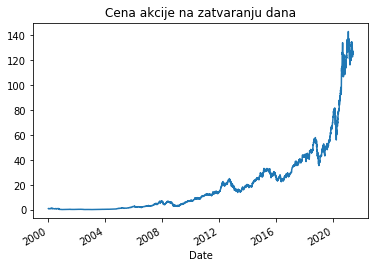

In [3]:
aapl_close.plot(title='Cena akcije na zatvaranju dana')

In [4]:
trainingLength = math.ceil(len(aapl_close)*0.8)

trainingLength

4304

In [5]:
aapl_reshaped = np.array(aapl_close)
aapl_reshaped = np.reshape(aapl_reshaped, (len(aapl_close), 1))

aapl_reshaped

array([[  0.99944198],
       [  0.91517901],
       [  0.92857099],
       ...,
       [124.84999847],
       [124.69000244],
       [127.30999756]])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

#scaled_data = scaler.fit_transform(aapl_reshaped)

scaler.fit(aapl_reshaped[0:trainingLength, :])
scaled_data = scaler.transform(aapl_reshaped)

scaled_data


array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [3.77443639],
       [3.76959034],
       [3.84894634]])

In [7]:
train_data = scaled_data[0:trainingLength, :]

Xtrain = []
Ytrain = []

for i in range(50, len(train_data)):
  Xtrain.append(train_data[i-50:i, 0])
  Ytrain.append(train_data[i, 0])

In [8]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [9]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain = np.asarray(Xtrain).astype('float32')
Xtrain.shape

(4254, 50, 1)

In [10]:
model = Sequential()

units = 50

model.add(LSTM(units, return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
model.add(LSTM(units, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse')

In [12]:
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
69/69 - 22s - loss: 0.0019 - val_loss: 8.3581e-04
Epoch 2/100
69/69 - 0s - loss: 1.2823e-04 - val_loss: 7.9488e-04
Epoch 3/100
69/69 - 0s - loss: 1.2591e-04 - val_loss: 0.0010
Epoch 4/100
69/69 - 0s - loss: 1.2332e-04 - val_loss: 6.7365e-04
Epoch 5/100
69/69 - 0s - loss: 1.1440e-04 - val_loss: 8.6954e-04
Epoch 6/100
69/69 - 0s - loss: 1.2440e-04 - val_loss: 0.0056
Epoch 7/100
69/69 - 0s - loss: 1.7601e-04 - val_loss: 7.4356e-04
Epoch 8/100
69/69 - 0s - loss: 1.0668e-04 - val_loss: 0.0019
Epoch 9/100
69/69 - 0s - loss: 1.2891e-04 - val_loss: 0.0020
Epoch 10/100
69/69 - 0s - loss: 1.1382e-04 - val_loss: 8.8500e-04
Epoch 11/100
69/69 - 0s - loss: 9.9934e-05 - val_loss: 7.5614e-04
Epoch 12/100
69/69 - 0s - loss: 9.8598e-05 - val_loss: 7.6421e-04
Epoch 13/100
69/69 - 0s - loss: 9.3180e-05 - val_loss: 8.5928e-04
Epoch 14/100
69/69 - 0s - loss: 1.0101e-04 - val_loss: 4.1537e-04
Epoch 15/100
69/69 - 0s - loss: 1.1679e-04 - val_loss: 4.0262e-04
Epoch 16/100
69/69 - 0s - loss: 8.0344

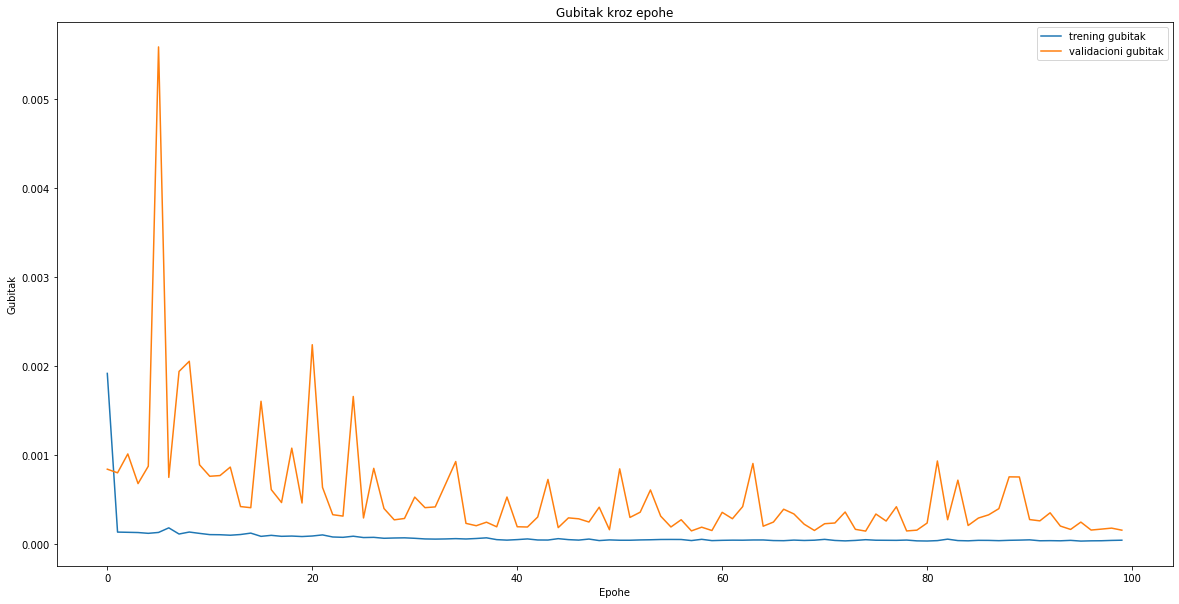

In [13]:
plt.figure(figsize=(20,10))
plt.title('Gubitak kroz epohe')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Gubitak')
plt.xlabel('Epohe')
plt.legend(['trening gubitak' , 'validacioni gubitak'], loc = 'upper right')
plt.show()

In [14]:
test_data = scaled_data[trainingLength: , :]


Xtest = []
Ytest = aapl_reshaped[trainingLength+50:, :]
for i in range(50, len(test_data)):
  Xtest.append(test_data[i-50:i, 0])


In [15]:
Xtest = np.array(Xtest)

Xtest

array([[0.99333647, 1.00219587, 1.01529578, ..., 1.07148113, 1.07019388,
        1.08056769],
       [1.00219587, 1.01529578, 1.01900606, ..., 1.07019388, 1.08056769,
        1.0873069 ],
       [1.01529578, 1.01900606, 1.0177946 , ..., 1.08056769, 1.0873069 ,
        1.08087053],
       ...,
       [3.51728618, 3.66055116, 3.62693102, ..., 3.77807111, 3.85318673,
        3.81744616],
       [3.66055116, 3.62693102, 3.68690234, ..., 3.85318673, 3.81744616,
        3.77443639],
       [3.62693102, 3.68690234, 3.65873392, ..., 3.81744616, 3.77443639,
        3.76959034]])

In [16]:
Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1], 1))

In [17]:
print(Xtest.shape)

(1026, 50, 1)


In [18]:
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 35.73821 ],
       [ 35.81525 ],
       [ 35.576706],
       ...,
       [106.7016  ],
       [105.07495 ],
       [105.90478 ]], dtype=float32)

In [19]:
print(predictions.shape)

(1026, 1)


In [20]:
#predictions = np.reshape(predictions, (len(predictions)))
#Ytest = np.reshape(Ytest, (len(Ytest)))

In [21]:
print(predictions.shape)

print(Ytest.shape)

(1026, 1)
(1026, 1)


In [22]:
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

9.092009437295797

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


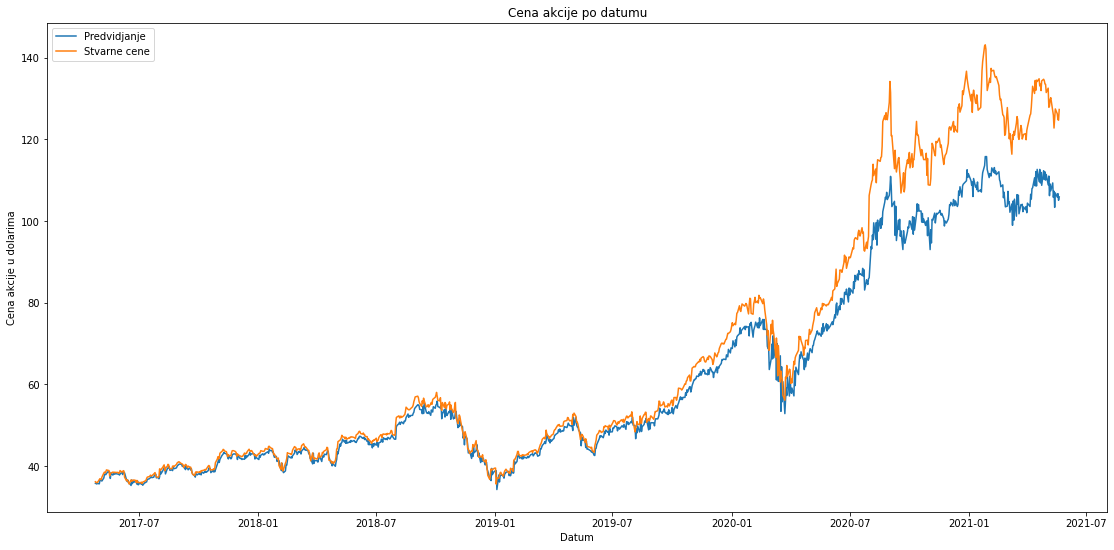

In [23]:
aapl1 = aapl[trainingLength+50:]
aapl1['Predictions'] = predictions


plt.figure(figsize=(19,9))
plt.plot(aapl1['Predictions'], label = 'Predvidjanje')
plt.plot(aapl1['Close'], label = 'Stvarne cene')
plt.xlabel('Datum')
plt.ylabel('Cena akcije u dolarima')
plt.title('Cena akcije po datumu')
plt.legend(loc= 'upper left')

plt.show()